Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
# YOUR CODE GOES HERE
print 'Shape of transactions :' , transactions.shape
print 'Shape of Items: ', items.shape
print 'Shape of item_categories: ', item_categories.shape
print 'Shape of shops: ', shops.shape

transactions.head()


Shape of transactions : (2935849, 6)
Shape of Items:  (22170, 3)
Shape of item_categories:  (84, 2)
Shape of shops:  (60, 2)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
# YOUR CODE GOES HERE
transactions[['day', 'month', 'year']] = transactions['date'].str.split('.', expand=True)
transactions.head()
# max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE
# grader.submit_tag('max_revenue', max_revenue)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013


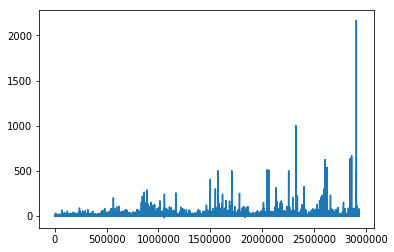

max of item_cnt_day 2169.0
min of item_cnt_day -22.0


In [13]:
# Visualize item_cnt_day
plt.plot(transactions['item_cnt_day'])
plt.show()
print 'max of item_cnt_day', transactions['item_cnt_day'].max()
print 'min of item_cnt_day', transactions['item_cnt_day'].min() 
# max_revenue = transactions[]

In [30]:
# items.head()
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [26]:
# transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')
# sept_value = transactions[(transactions.date.dt.year==2014) & (transactions.date.dt.month==9)]
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')
sept_value = transactions[(transactions.date.dt.year==2014) & (transactions.date.dt.month==9)]
print type(sept_value)
print sept_value.head()

<class 'pandas.core.frame.DataFrame'>
              date  date_block_num  shop_id  item_id  item_price  \
1953691 2014-09-24              20        5     1039       899.0   
1953692 2014-09-27              20        5     1015       449.0   
1953693 2014-09-07              20        5     1329       399.0   
1953694 2014-09-27              20        5      984       399.0   
1953695 2014-09-08              20        5      984       399.0   

         item_cnt_day day month  year  
1953691           1.0  24    09  2014  
1953692           1.0  27    09  2014  
1953693           1.0  07    09  2014  
1953694           1.0  27    09  2014  
1953695           1.0  08    09  2014  


In [27]:
sept_value['revenue_per_day'] = sept_value['item_price']*sept_value['item_cnt_day']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
max_revenue = sept_value.groupby('shop_id')['revenue_per_day'].sum().max()
print "maximum revenue among all shops on 09/2014", max_revenue
grader.submit_tag('max_revenue', max_revenue)

maximum revenue among all shops on 09/2014 7982852.2
Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [40]:
# Need to join transactions with items DataFrame with key = 'item_id'
transactions = transactions.join(items.set_index('item_id'), on='item_id')

In [43]:
# YOUR CODE GOES HERE
summer_value = transactions[(transactions.date.dt.year==2014) & ((transactions.date.dt.month == 6) |
                                                               (transactions.date.dt.month == 7) |
                                                               (transactions.date.dt.month == 8))]
summer_value.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id
1705909,2014-06-15,17,26,9532,399.00,1.0,15,06,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1705910,2014-06-10,17,26,9507,149.00,1.0,10,06,2014,В ПОИСКАХ НЕМО (регион),40
1705911,2014-06-13,17,26,9509,246.32,1.0,13,06,2014,В ПОСТЕЛИ С ВРАГОМ (BD),37
1705912,2014-06-03,17,26,9532,399.00,1.0,03,06,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1705913,2014-06-08,17,26,9532,399.00,1.0,08,06,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [69]:
summer_value['revenue_per_day'] = summer_value['item_price']*summer_value['item_cnt_day']
max_value_by_catetory_id = summer_value.groupby('item_category_id')['revenue_per_day'].sum().max()
print 'maximum value by item_category_id', max_value_by_catetory_id
category_set= set(summer_value['item_category_id'])
category_set = list(category_set)
sum_value_by_category_id = summer_value.groupby('item_category_id')['revenue_per_day'].sum()
print type(sum_value_by_category_id)
category_id_with_max_revenue = sum_value_by_category_id.idxmax(axis=1)
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

maximum value by item_category_id 32157302.43
<class 'pandas.core.series.Series'>
Current answer for task category_id_with_max_revenue is: 20


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [79]:
# YOUR CODE GOES HERE
num_items_constant_price = sum(transactions.groupby('item_id')['item_price'].nunique()==1)
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [86]:
item_25_09_2014 = transactions[(transactions['shop_id'] == 25) & (transactions.date.dt.month==9)
                               & (transactions.date.dt.year==2014)]
# print item_25_09_2014.head()
item_25_09_2014 = item_25_09_2014.groupby('day')['item_cnt_day'].sum()
print type(item_25_09_2014)

<class 'pandas.core.series.Series'>


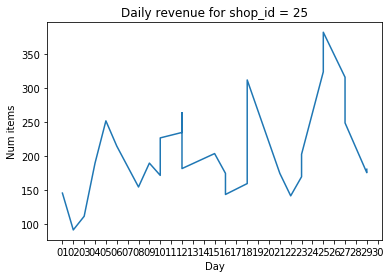

<type 'numpy.ndarray'>
Current answer for task total_num_items_sold_var is: 4097.52888889


In [92]:
shop_id = 25

total_num_items_sold = item_25_09_2014.values# YOUR CODE GOES HERE
days = item_25_09_2014.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

print type(total_num_items_sold)

total_num_items_sold_var = np.var(total_num_items_sold)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)